In [18]:
import pathlib

import pandas as pd
import seaborn as sns

In [2]:
results_files = pathlib.Path("./data/").glob("results*")
results = []
for f in results_files:
    df = pd.read_csv(f)
    parts = str(f).replace(".csv", "").split("_")
    df['num_agents'] = int(parts[1])
    df['num_items'] = int(parts[2])
    df['num_weeks'] = int(parts[3])
    results.append(df)
results = pd.concat(results).reset_index(drop=True)

In [3]:
def parse_results(s):
    parts = s.split(",")
    stat = float(parts[0].split("=")[-1])
    pval = float(parts[1].split("=")[-1].replace(")", ""))
    return [stat, pval]

In [4]:
results['time_split'] = results['time_ks'].apply(parse_results)
results['churn_split'] = results['churn_ks'].apply(parse_results)

In [5]:
time = pd.DataFrame(results['time_split'].tolist(), columns=["time_stat", "time_pval"])
churn = pd.DataFrame(results['churn_split'].tolist(), columns=["churn_stat", "churn_pval"])
results = pd.concat([results.drop(columns=['time_ks', 'churn_ks', 'time_split', 'churn_split']), time, churn], axis=1)

In [6]:
results.sort_values(by=["mean_jsd", "time_stat", "churn_stat"], ascending=True)

,pop,pl,mean_jsd,num_agents,num_items,num_weeks,time_stat,time_pval,churn_stat,churn_pval
35,0.60,1.000000,0.149809,2000000,116,36,0.307692,0.588196,0.371429,1.530453e-02
15,0.75,1.000000,0.156501,1000000,116,36,0.384615,0.299920,0.285714,1.150772e-01
50,0.70,1.555556,0.159607,2000000,116,36,0.230769,0.897806,0.314286,6.254809e-02
12,0.50,1.500000,0.161959,1000000,116,36,0.230769,0.897806,0.514286,1.404438e-04
31,0.50,1.666667,0.172317,2000000,116,36,0.285714,0.635485,0.514286,1.404438e-04
...,...,...,...,...,...,...,...,...,...,...
47,0.70,1.222222,0.280049,2000000,116,36,0.250000,0.716412,0.628571,8.461968e-07
20,1.00,1.000000,0.306926,1000000,116,36,0.538462,0.044272,1.000000,1.782749e-20
24,1.00,2.000000,0.329638,1000000,116,36,0.538462,0.044272,0.971429,1.247924e-18
23,1.00,1.750000,0.335940,1000000,116,36,0.461538,0.126488,0.971429,1.247924e-18


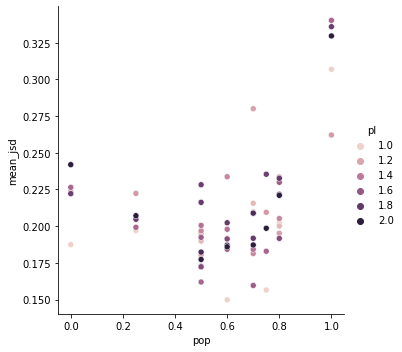

In [24]:
sns.relplot(data=results, x="pop", y="mean_jsd", hue="pl")

In [25]:
results

,pop,pl,mean_jsd,num_agents,num_items,num_weeks,time_stat,time_pval,churn_stat,churn_pval
0,0.0,1.000000,0.187370,1000000,116,36,0.250000,0.716412,0.571429,1.286219e-05
1,0.0,1.250000,0.223591,1000000,116,36,0.277778,0.502590,0.628571,8.461968e-07
2,0.0,1.500000,0.226471,1000000,116,36,0.222222,0.781048,0.657143,1.896648e-07
3,0.0,1.750000,0.222151,1000000,116,36,0.277778,0.502590,0.571429,1.286219e-05
4,0.0,2.000000,0.241931,1000000,116,36,0.222222,0.781048,0.714286,7.072247e-09
...,...,...,...,...,...,...,...,...,...,...
60,0.8,1.555556,0.229921,2000000,116,36,0.307692,0.588196,0.400000,6.871420e-03
61,0.8,1.666667,0.191681,2000000,116,36,0.307692,0.588196,0.200000,4.916448e-01
62,0.8,1.777778,0.232608,2000000,116,36,0.230769,0.897806,0.371429,1.530453e-02
63,0.8,1.888889,0.221698,2000000,116,36,0.230769,0.897806,0.314286,6.254809e-02
